In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import DecisionBoundaryDisplay

Zunächst erzeugen wir den Datensatz mit zwei verschränkten Monden.

In [2]:
X, y = make_moons(n_samples=100, noise = 0.25, random_state=0)
y_cat = pd.Categorical.from_codes(y, categories=["A", "B"])

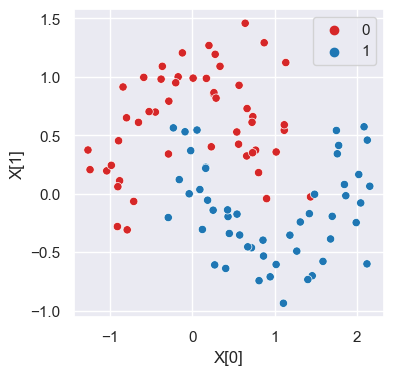

In [3]:
sns.set_theme()

fig, ax = plt.subplots(figsize = (4, 4))
sns.scatterplot(ax=ax, x = X[:, 0], y = X[:, 1], hue=y, palette=["tab:red", "tab:blue"])
ax.set(xlabel= "X[0]", ylabel="X[1]")
plt.show()

### Entscheidungsbäume

Nun fitten wir einen Entscheidungsbaum der Tiefe 1.

In [4]:
tree_1 = DecisionTreeClassifier(max_depth=1)
tree_1.fit(X, y)

DecisionTreeClassifier(max_depth=1)

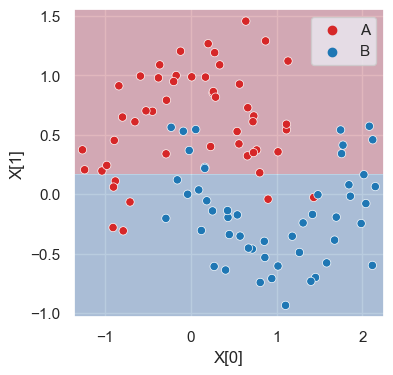

In [5]:
fig, ax = plt.subplots(figsize=(4,4))

DecisionBoundaryDisplay.from_estimator(ax=ax, estimator = tree_1, X= X,
    grid_resolution=200, eps=0.1, alpha=0.3, cmap="RdBu", response_method="predict")

sns.scatterplot(ax=ax, x = X[:, 0], y = X[:, 1], hue=y_cat, palette=["tab:red", "tab:blue"])
ax.set(xlabel= "X[0]", ylabel="X[1]")
plt.show()

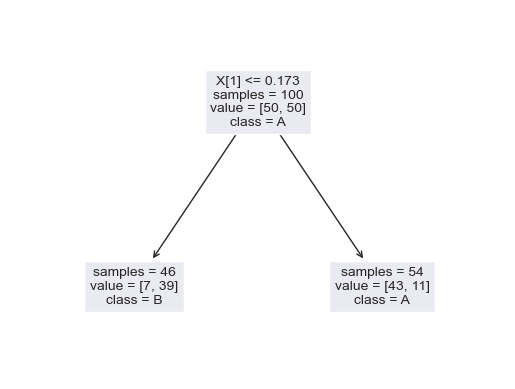

In [6]:
plot_tree(tree_1,
    class_names=["A", "B"],
    label = "all",
    #filled = True,
    impurity=False,
    fontsize = 10)
plt.show()

Nun zum Vergleich ein Entscheidungsbaum mit Tiefe 2 und die beiden Darstellungen in einem Plot.

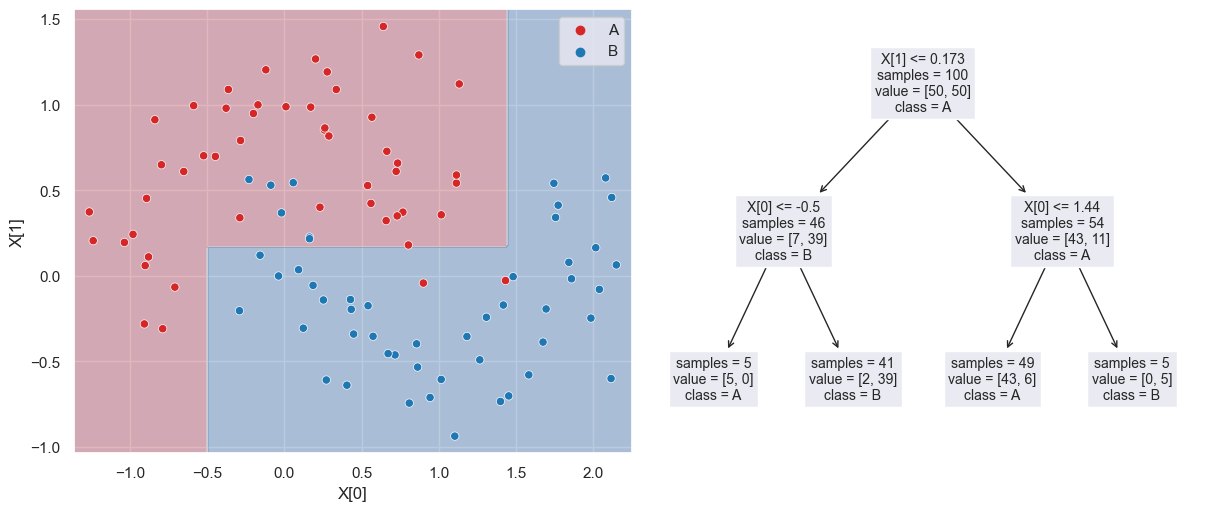

In [7]:
tree_2 = DecisionTreeClassifier(max_depth=2)
tree_2.fit(X, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")

DecisionBoundaryDisplay.from_estimator(ax=axs[0], estimator = tree_2, X= X,
    grid_resolution=200, eps=0.1, alpha=0.3, cmap="RdBu", response_method="predict")

sns.scatterplot(ax=axs[0], x = X[:, 0], y = X[:, 1], hue=y_cat, palette=["tab:red", "tab:blue"])
axs[0].set(xlabel= "X[0]", ylabel="X[1]")

plot_tree(tree_2, ax=axs[1],
    class_names=["A", "B"],
    label = "all",
    impurity=False)

plt.show()

Und nun ein Entscheidungsbaum mit unbegrenzter Tiefe.

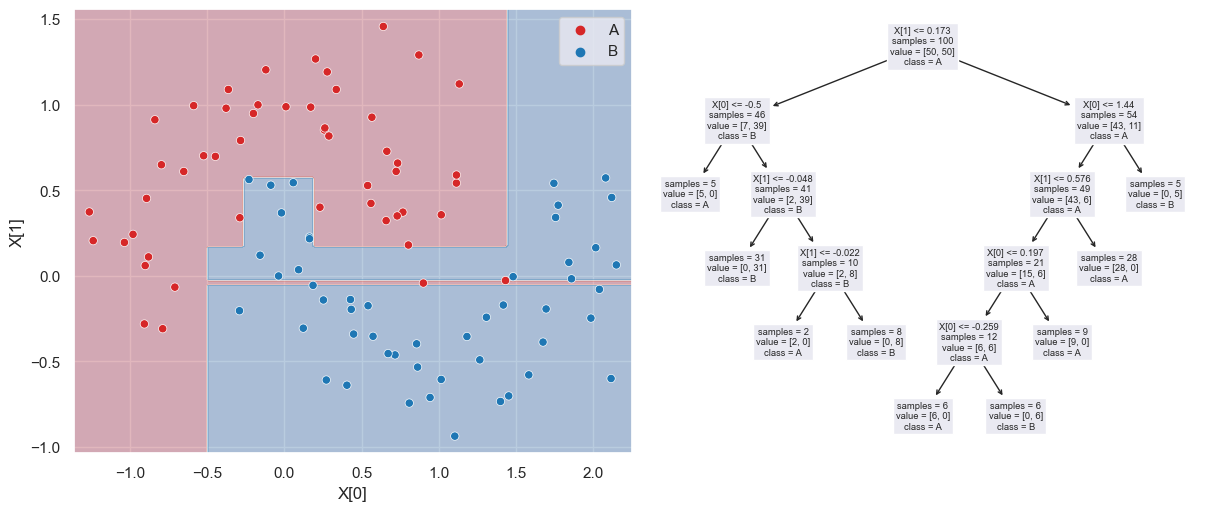

In [8]:
tree_full = DecisionTreeClassifier()
tree_full.fit(X, y)

fig, axs = plt.subplots(1, 2, figsize=(12, 5), layout="constrained")

DecisionBoundaryDisplay.from_estimator(ax=axs[0], estimator = tree_full, X= X,
    grid_resolution=200, eps=0.1, alpha=0.3, cmap="RdBu", response_method="predict")

sns.scatterplot(ax=axs[0], x = X[:, 0], y = X[:, 1], hue=y_cat, palette=["tab:red", "tab:blue"])
axs[0].set(xlabel= "X[0]", ylabel="X[1]")

plot_tree(tree_full, ax=axs[1],
    class_names=["A", "B"],
    label = "all",
    impurity=False)

plt.show()

### Random Forests

Wir trainieren ein Ensemble aus 100 leicht unterschiedlichen Entscheidungsbäumen.

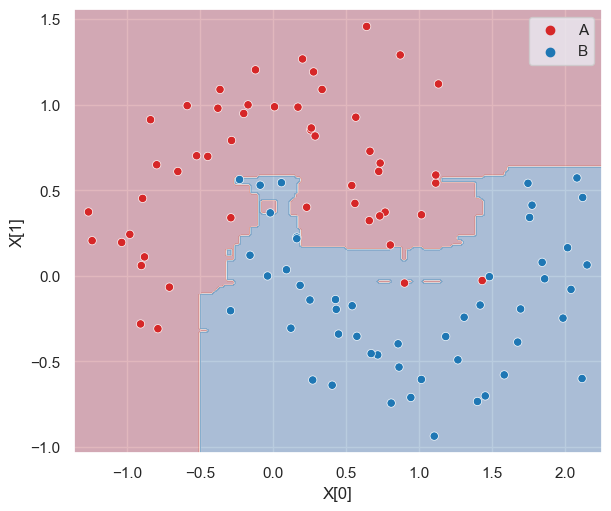

In [9]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0).fit(X, y)

fig, ax = plt.subplots(1, 1, figsize=(6, 5), layout="constrained")
DecisionBoundaryDisplay.from_estimator(ax=ax, estimator = rf, X= X, 
    grid_resolution=200, eps=0.1, alpha=0.3, cmap="RdBu", response_method="predict")
sns.scatterplot(ax=ax, x = X[:, 0], y = X[:, 1], hue=y_cat, palette=["tab:red", "tab:blue"])
ax.set(xlabel= "X[0]", ylabel="X[1]")

plt.show()